In [2]:
from konlpy.tag import Okt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
상폐기업뉴스 = pd.read_csv('../../뉴스전처리/상폐기업뉴스전처리.csv')
정상기업뉴스 = pd.read_csv('../../뉴스전처리/정상기업뉴스전처리.csv')
stopwords = pd.read_csv('./stopword.csv')

뉴스 = pd.concat([상폐기업뉴스, 정상기업뉴스])
뉴스

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,네이쳐글로벌,2010.08.16. 오후 5:21,"네이쳐글로벌, 반기검토의견 ""의견거절'…거래정지",네이쳐글로벌는 일 반기 검토 의견이 의견거절로 관리종목 지정 사유가 발생했다고 공시...
1,네이쳐글로벌,2010.07.15. 오후 6:46,네이쳐글로벌 신용등급 `CC`로 두단계 하향,네이쳐글로벌의 신용등급을 기존 에서 으로 하향 조정한다고 한신정평가가 일 밝혔다....
2,네이쳐글로벌,2010.06.03. 오후 5:06,"네이쳐글로벌, 20대 1 감자 실시",네이쳐글로벌은 대 감자를 결의했다고 일 공시했다.감자 주주총회일은 다음달 일 감...
3,네이쳐글로벌,2010.05.24. 오전 10:41,<생생코스닥> 네이쳐글로벌 3거래일 연속 하한가,네이쳐글로벌이 연 거래일 연속 하한가를 기록하며 주가가 원 선 마저 위협 받고 있다...
4,네이쳐글로벌,2010.05.18. 오후 1:23,"네이쳐글로벌 ""생수시장 진출 하반기 150억 계획""",네이쳐글로벌은 대규모 생수회사를 자산양수도 방식으로 인수 추진 중이라고 일 밝혔다....
...,...,...,...,...
2490,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다.사진에이치엘비에이치엘비의 ...
2491,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
2492,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
2493,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


In [5]:
okt = Okt()
# Okt로 토큰화
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: okt.morphs(x))
# 한 글자 단어 제거
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])
# stopwords에 있는 불용어 제거
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word not in stopwords])
뉴스

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,네이쳐글로벌,2010.08.16. 오후 5:21,"네이쳐글로벌, 반기검토의견 ""의견거절'…거래정지","[네이쳐, 글로벌, 반기, 검토, 의견, 의견, 거절, 관리종목, 지정, 사유, 발..."
1,네이쳐글로벌,2010.07.15. 오후 6:46,네이쳐글로벌 신용등급 `CC`로 두단계 하향,"[네이쳐, 글로벌, 신용등급, 기존, 에서, 으로, 하향, 조정, 한다고, 한신정,..."
2,네이쳐글로벌,2010.06.03. 오후 5:06,"네이쳐글로벌, 20대 1 감자 실시","[네이쳐, 글로벌, 감자, 결의, 했다고, 공시, 했다, 감자, 주주총회, 다음, ..."
3,네이쳐글로벌,2010.05.24. 오전 10:41,<생생코스닥> 네이쳐글로벌 3거래일 연속 하한가,"[네이쳐, 글로벌, 거래, 연속, 한가를, 기록, 하며, 주가, 마저, 위협, 받고..."
4,네이쳐글로벌,2010.05.18. 오후 1:23,"네이쳐글로벌 ""생수시장 진출 하반기 150억 계획""","[네이쳐, 글로벌, 대규모, 생수, 회사, 자산, 수도, 방식, 으로, 인수, 추진..."
...,...,...,...,...
2490,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑","[에이치엘비, 유럽, 종양, 학회, 에서, 리보, 세라, 가치, 입증, 했다, 사진..."
2491,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표","[에이치엘비, 김제, 기자, 에이치엘비, 유럽, 종양, 학회, 에서, 리보, 세라,..."
2492,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""","[연료, 선박, 개발, 협력, 유람선, 상용, 목표, 설계, 모듈, 연료, 전지, ..."
2493,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동","[코스닥, 지수, 지난해, 대비, 상승, 개인, 비중, 확대, 거래, 급등, 한국,..."


리뷰의 최대 길이 : 1727
리뷰의 평균 길이 : 178.34308254762362


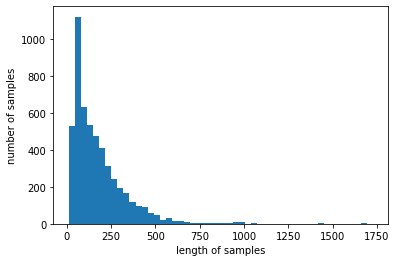

In [6]:
print('리뷰의 최대 길이 :',max(len(review) for review in 뉴스['뉴스기사본문전처리']))
print('리뷰의 평균 길이 :',sum(map(len, 뉴스['뉴스기사본문전처리']))/len(뉴스['뉴스기사본문전처리']))
plt.hist([len(review) for review in 뉴스['뉴스기사본문전처리']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [7]:
# size = 만들어질 워드 벡터의 차원
# window = 단어 앞과 뒤에서 몇개를 볼것인지 정하는 킉
# min_count = 단어 최소 빈도수의 임계치(이 임계치보다 적은 단어는 훈련시키지 않음)
# workers = 학습에 이용하는 프로세스의 갯수
# sg = 0 일 경우 CBOW, 1 일 경우 Skip-gram
model = Word2Vec(sentences=뉴스['뉴스기사본문전처리'], vector_size=200 ,window=5, min_count=5, workers=4, sg=1)
model.wv.vectors.shape

(12313, 200)

In [9]:
# 폐지 유사단어 추출
유사도결과 = pd.DataFrame(model.wv.most_similar(["폐지"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,밟게,0.855788
1,됐거나,0.849012
2,적격성,0.825285
3,영업일,0.821042
4,밟는다,0.813534
5,상폐,0.812837
6,현행,0.804522
7,날로,0.799909
8,벼랑,0.796958
9,수순,0.793244


In [12]:
# 폐지 퇴출 유사단어 추출
유사도결과 = pd.DataFrame(model.wv.most_similar(["상폐"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,상장폐지,0.838002
1,밟게,0.812870
2,폐지,0.812837
3,모면,0.800542
4,수순,0.787465
5,적격성,0.782033
6,됐거나,0.777796
7,놓인,0.776877
8,판가름,0.776081
9,폐가,0.775748


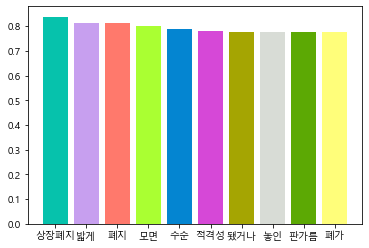

In [13]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

def showGraph(bargraph):
     xtick = [item[0] for item in bargraph] # 단어
     ytick = [item[1] for item in bargraph] # 유사도
     plt.figure()
     mycolors = ['#06c2ac', '#c79fef', '#ff796c', '#aaff32', '#0485d1', '#d648d7', '#a5a502', '#d8dcd6', '#5ca904', '#fffe7a' ]
     plt.bar(xtick, ytick, color=mycolors)

bargraph = model.wv.most_similar(positive=['상폐'],topn=10)

showGraph(bargraph)

## 출처 : https://m.blog.naver.com/skfnsid123/221922849459

In [1]:
## Embedding Projector 사용 위한 tsv파일 저장

df = pd.DataFrame(model.wv.vectors)
df.to_csv('./wv_model_tsv_okt.tsv', sep='\t', index=False)
word_df = pd.DataFrame(model.wv.index_to_key)
word_df.to_csv('./wv_word_tsv_okt.tsv', sep = '\t', index = False)

NameError: name 'pd' is not defined

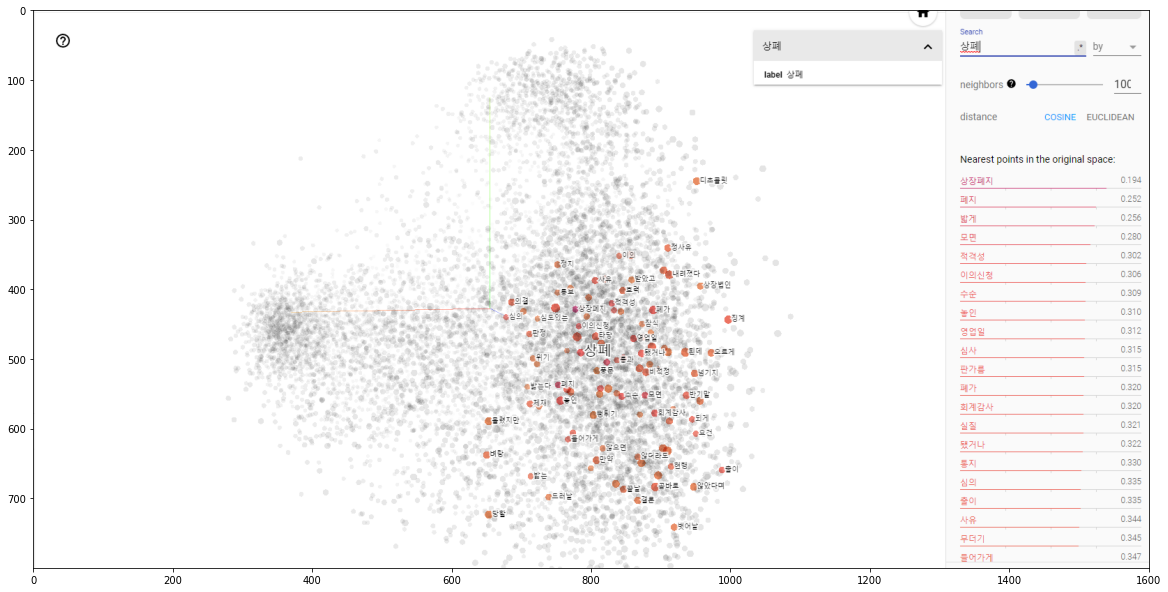

In [3]:
path = './Embedding_Project_okt.png'
image_pil = Image.open(path)
image_bw = np.array(image_pil)

plt.figure(figsize=(20,30))
plt.imshow(image_bw)
plt.show()

## 출처 https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=222099536934